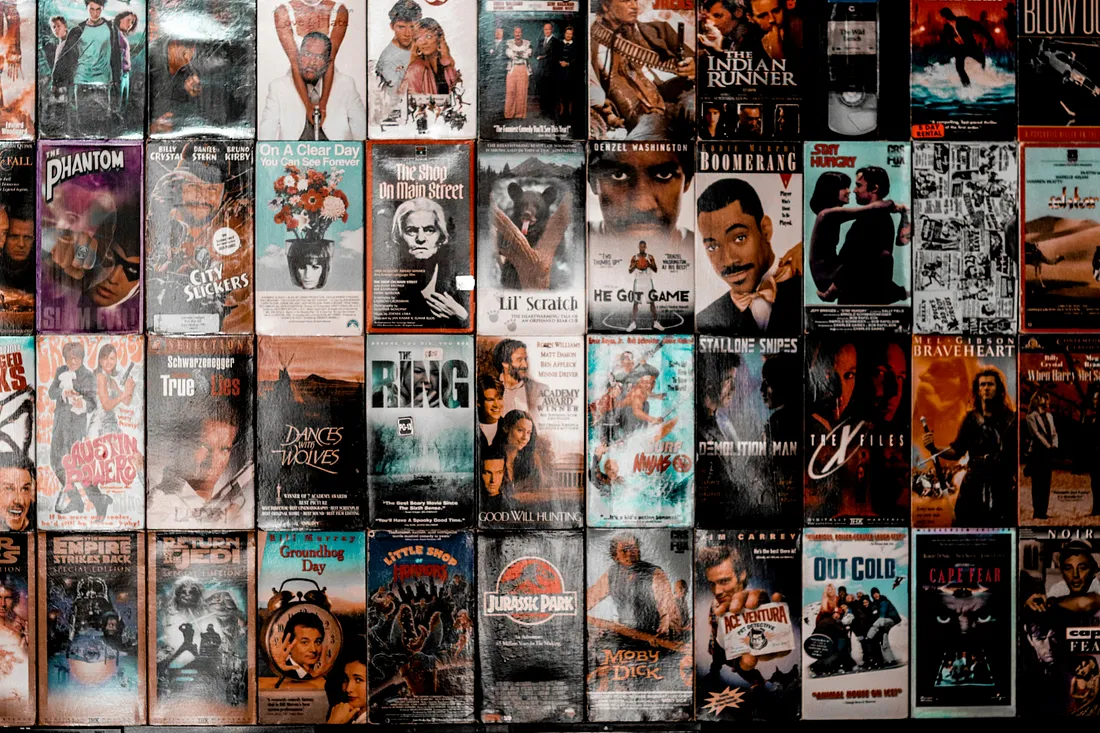
# **Movie Recommender System** 

### Authors:
* Jeremiah Waiguru
* Paul Ngatia
* Winfred Bundi
* Mercy Kiragu

## **Project Overview:** 
**Building a Comprehensive Movie Recommendation System**

In this project, our goal is to design and implement a versatile movie recommendation system employing three distinct techniques: a simple recommender, collaborative filtering, and content-based filtering. Leveraging the MovieLens dataset, we aim to provide users with personalized recommendations for the top 5 movies.

The **simple recommender model** will prioritize movies based on their overall popularity. Utilizing metrics such as ratings count, reviews(user ratings) we will generate a list of top movies that have garnered widespread acclaim.

The **collaborative filtering approach** takes center stage as our primary recommender. By analyzing user behavior and preferences, the system will identify similar users or movies, providing recommendations based on collective user experiences. This model is crucial for offering personalized suggestions rooted in user interactions.

To tackle the **cold-start problem**, especially pertinent for new users and items, we will implement a **content-based filtering model**. This approach relies on the intrinsic features of movies, such as genre, director, and actors, to provide recommendations until sufficient user interaction data is accumulated.

The project's success will be evaluated using established metrics such as RMSE and MAE scores, ensuring the effectiveness of each recommendation technique. By combining the strengths of these diverse models, our system aims to deliver accurate and user-centric movie recommendations, enhancing the overall user experience and addressing the challenges posed by the cold-start problem.

## **Business Understanding**

BingeMax, a leading streaming platform in the entertainment industry, is grappling with a critical business challenge in the age of personalized user experiences. The industry trend towards customized content consumption has amplified the need for effective recommendation systems. In response, BingeMax aims to boost user satisfaction and engagement by implementing a robust movie recommendation system.

The main goal is to design and deploy a recommendation system that accurately suggests the top 5 movies to each user based on their ratings of other films. BingeMax plans to utilize the MovieLens dataset from the GroupLens research lab at the University of Minnesota, particularly the "small" dataset containing 100,000 user ratings. This dataset is seen as a valuable asset for training the recommendation algorithm to understand user preferences and deliver personalized content suggestions.

The successful implementation of this recommendation system is essential to BingeMax's user interface, as it will significantly influence the content users interact with on the platform. The system's effectiveness directly affects user satisfaction, retention, and overall engagement with the BingeMax streaming service. Therefore, we have been tasked with developing an effective and accurate recommendation system that enhances the overall user experience, contributing to BingeMax's competitive edge in the dynamic entertainment market.


The project incorporates three primary recommendation techniques:

Popularity-based Recommendations: This method prioritizes movies based on their global popularity metrics, ensuring users are exposed to widely acclaimed content. The objective is to set a consistent benchmark for user expectations.

Collaborative Filtering as Core Recommender: Serving as the primary recommendation engine, collaborative filtering analyzes user behavior to identify similar users and movies. This technique aims to deliver personalized recommendations based on collective user experiences, with accuracy measured by RMSE.

Content-Based Filtering for Cold-Start Mitigation: To address the challenge of new users or items with limited interaction data, our content-based model uses intrinsic movie features to generate relevant recommendations. This approach acts as an interim solution until user preferences are well-established, with RMSE used to assess recommendation accuracy.

The success of the recommendation system will be primarily evaluated using Root Mean Squared Error (RMSE). This metric provides a consistent and comprehensive measure of the accuracy and effectiveness of each recommendation technique. Our ultimate goal is to deliver precise and user-specific movie suggestions, ensuring a seamless and enjoyable entertainment experience for our users.

### Business Objective

- Evaluate the recommendation algorithm's efficiency regarding training time and resource utilization. Ensure the system can handle the dataset and deliver real-time recommendations without excessive computational demands.
- Assess the system's performance in scenarios with limited or no historical data for new users (cold start problem). Measure how effectively the recommender adapts to providing relevant suggestions for users with sparse or no rating history.
- Analyze the impact of the recommender system on user retention. Compare retention rates before and after implementing the system to determine if personalized recommendations positively influence users to continue using the Tazama platform.
- Evaluate the effect of the recommender system on user engagement metrics. Monitor changes in user interaction patterns, including increased time spent on the platform, higher click-through rates, and more movies watched per session.

### Data Mining Objectives

- Build a recommender system with 80% accuracy

## **Data Understanding**

Our data source for this project is the MovieLens dataset, a comprehensive collection of user interactions with movies. The dataset includes key information such as user ratings, movie metadata, and user demographics. The link to the MovieLens dataset: https://grouplens.org/datasets/movielens/latest/. The data are contained in four different files which are all loaded and viewed. The files are movies.csv, ratings.csv, links.csv, and tags.csv 

Variables like movie titles, genres, user IDs, and ratings form the core of our data, enabling us to capture user preferences and movie characteristics. Additionally, we have access to metadata encompassing movie details such as genres, tags, and release years. Here are some common columns found in the MovieLens datasets:

* userId: An identifier for the user who provided the movie rating.
* movieId: An identifier for the movie that was rated.
* rating: The user's rating for a particular movie, often on a scale (e.g., 1 to 5 stars).
* timestamp: The timestamp indicating when the rating was given by the user. It is usually in Unix epoch format.
* title: The title of the movie.
* genres: A list of genres associated with the movie. Movies can belong to multiple genres.

To ensure the quality of our recommendations, we will conduct thorough data preprocessing, handling missing values and addressing potential outliers. Exploratory Data Analysis (EDA) will be employed to gain insights into the distribution of ratings, user engagement patterns, and feature correlations.

Understanding the temporal aspects of the data, such as trends over time and seasonality, will further inform our recommendation strategies. Given the collaborative nature of our primary recommender, collaborative filtering, we'll delve into user-item interactions to identify patterns and similarities that contribute to accurate personalized recommendations.

With a solid foundation in the MovieLens dataset, we aim to extract meaningful insights, optimize data quality, and lay the groundwork for effective implementation of our recommendation models.

## Data Preparation/Preprocessing


### Importing libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd
from surprise import accuracy
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV


### Loading datasets

In [4]:

class DataLoader:
    def __init__(self, base_path):
        self.base_path = base_path

    def load_dataset(self, file_name):
        return pd.read_csv(f'{self.base_path}/{file_name}')

    def load_movies(self):
        return self.load_dataset('movies.csv')

    def load_ratings(self):
        return self.load_dataset('ratings.csv')

    def load_tags(self):
        return self.load_dataset('tags.csv')

    def load_links(self):
        return self.load_dataset('links.csv')  

# Initialize DataLoader and load datasets
base_path = 'ml-latest-small' 
data_loader = DataLoader(base_path)

movies = data_loader.load_movies()
ratings = data_loader.load_ratings()
tags = data_loader.load_tags()
links = data_loader.load_links()

# Display the first few rows of each dataset
print("Movies DataFrame:")
print(movies.head())
print("\nRatings DataFrame:")
print(ratings.head())
print("\nTags DataFrame:")
print(tags.head())
print("\nlinks DataFrame:")
print(links.head())


Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly

#### checking the shape

In [5]:
# function to check the shape of the datasets

class DataLoader:
    def __init__(self, datasets):
        self.datasets = datasets

    def check_shapes(self):
        # Check the shape of each dataset
        for name, df in self.datasets.items():
            print(f"{name} DataFrame Shape: {df.shape}")

# Pre-loaded datasets
datasets = {
    'Movies': movies,
    'Ratings': ratings,
    'Tags': tags,
    'Links': links
}

# Initialize DataLoader with pre-loaded datasets
data_loader = DataLoader(datasets)

# Display the shape of each dataset
data_loader.check_shapes()


Movies DataFrame Shape: (9742, 3)
Ratings DataFrame Shape: (100836, 4)
Tags DataFrame Shape: (3683, 4)
Links DataFrame Shape: (9742, 3)


#### verify data types

In [6]:
# Data Types Verification: 
print("Movies DataFrame Info:")
movies.info()

print("\nRatings DataFrame Info:")
ratings.info()

print("\nLinks DataFrame Info:")
links.info()

print("\nTags DataFrame Info:")
tags.info()

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Links DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

#### Checking missing values

In [7]:
# Check for missing values
print("Missing Values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing Values in Links DataFrame:")
print(links.isnull().sum())

print("\nMissing Values in Tags DataFrame:")
print(tags.isnull().sum())

Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing Values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


From the above information, our datasets have no missing data except for the links dataset.

We are going to remove the rows with missing data since it is only 0.082% of the data

In [8]:
# Handling Missing Values
# drop rows with missing data in the tmdbId column of the links.csv dataset, 
links.dropna(inplace=True)

#### checking duplicates

In [9]:
# Check for duplicates in each dataset
duplicates = {
    "movies.csv": movies.duplicated().sum(),
    "ratings.csv": ratings.duplicated().sum(),
    "tags.csv": tags.duplicated().sum(),
    "links.csv": links.duplicated().sum()
}

print(duplicates)

{'movies.csv': 0, 'ratings.csv': 0, 'tags.csv': 0, 'links.csv': 0}


To gain more insights that can guide our model development, We'll look at the distribution of ratings, the number of movies and users, and conduct a genre analysis.

Therefore we'll merge the two datasets, 'movies' and 'Ratings' 

#### Work on columns then merge datasets

In [10]:
# Convert timestamp column in `ratings.csv` to a more readable date-time format.

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Display the updated data types for these two datasets
updated_data_type = {
    "ratings.csv": ratings.dtypes,
}

updated_data_type

{'ratings.csv': userId                int64
 movieId               int64
 rating              float64
 timestamp    datetime64[ns]
 dtype: object}

In [11]:
#  confirm the timestamp column is now in date time
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [12]:
# Genre Processing: Split the genres in the `movies.csv` dataset 

# Ensuring  genres are split correctly
movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else x)
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


#### Merging datasets

In [13]:
# Merge movies with ratings
movies_ratings = pd.merge(ratings, movies, on='movieId')

# Display the first few rows of the merged dataset
movies_ratings


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,Bloodmoon (1997),"[Action, Thriller]"
100832,610,160527,4.5,2016-11-19 08:43:18,Sympathy for the Underdog (1971),"[Action, Crime, Drama]"
100833,610,160836,3.0,2017-05-03 20:53:14,Hazard (2005),"[Action, Drama, Thriller]"
100834,610,163937,3.5,2017-05-03 21:59:49,Blair Witch (2016),"[Horror, Thriller]"


###### CREATING NEW COLUMN YEAR 

In [14]:
# Extract the year from the 'Title' column and create a new column 'Year'
movies_ratings['Year'] = movies_ratings['title'].str.extract(r'\((\d{4})\)')

# View the updated DataFrame with the 'Year' column
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres,Year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995


In [15]:

# Remove the year in parenthesis from the title column
movies_ratings['title'] = movies_ratings['title'].str.replace(r'\s*\(\d{4}\)', '')

# View the updated DataFrame
movies_ratings.head()


,userId,movieId,rating,timestamp,title,genres,Year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995


In [16]:
movies_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'Year'], dtype='object')

### EXPLORATORY DATA ANALYSIS 

In [17]:
# Calculating statistics about the ratings dataset
total_ratings = len(ratings)
unique_movies = ratings['movieId'].nunique()
unique_users = ratings['userId'].nunique()

# Calculating averages
avg_ratings_per_user = total_ratings / unique_users
avg_ratings_per_movie = total_ratings / unique_movies

# Print the calculated statistics
print(f"Total number of ratings: {total_ratings}")
print(f"Number of unique movies: {unique_movies}")
print(f"Number of unique users: {unique_users}")
print(f"Average number of ratings per user: {avg_ratings_per_user:.2f}")
print(f"Average number of ratings per movie: {avg_ratings_per_movie:.2f}")


Total number of ratings: 100836
Number of unique movies: 9724
Number of unique users: 610
Average number of ratings per user: 165.30
Average number of ratings per movie: 10.37


##### 1.) DISTRIBUTION OF MOVIE RATINGS

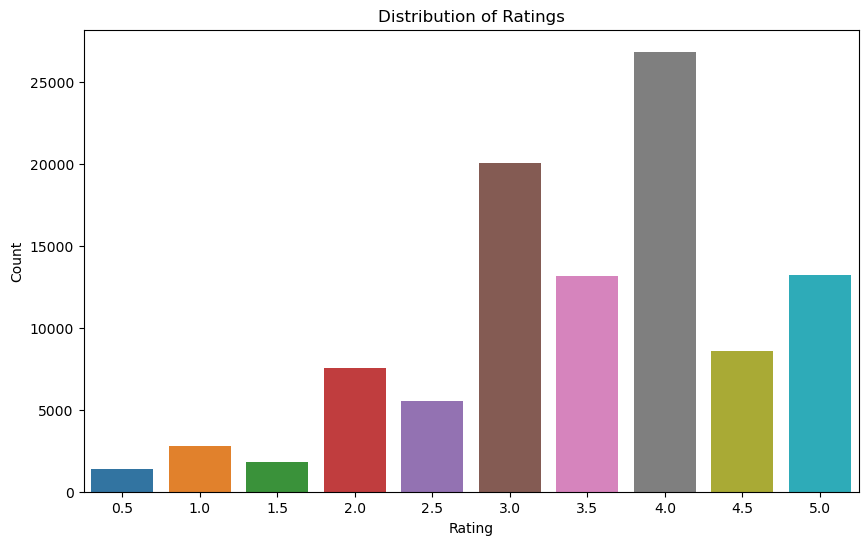

In [18]:


# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=movies_ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The top-rated movies received a score of 5, while the lowest-rated ones were rated as low as 0.5. Most films were rated either 3 or 4, with a minority receiving ratings of 0.5 or 1.5.

##### 2.) DISTRIBUTION OF TOP 10 MOST RATED MOVIES.

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


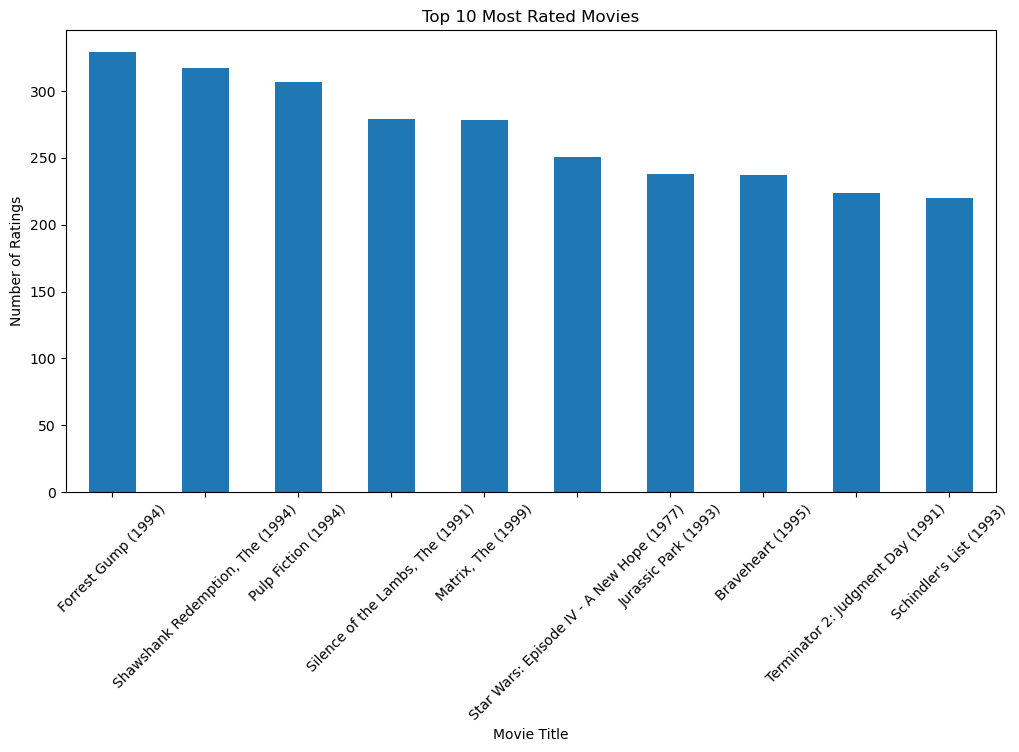

In [19]:
# Count ratings per movie
ratings_count = movies_ratings.groupby('title')['rating'].count().sort_values(ascending=False)

# Top 10 most rated movies
top_rated_movies = ratings_count.head(10)
print(top_rated_movies)

# Plot top rated movies
plt.figure(figsize=(12, 6))
top_rated_movies.plot(kind='bar')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


The most rated movie had 329 ratings.

##### 3.) CHECKING FOR THE LOWEST AND HIGHEST RATED MOVIES

In [20]:


# Calculate mean rating and number of ratings per movie
movie_stats = ratings.groupby('movieId')['rating'].agg(['mean', 'count'])

# Define constants for Bayesian average
C = movie_stats['mean'].mean()  # Mean rating across all movies
m = movie_stats['count'].quantile(0.7)  # Minimum number of ratings required for consideration

# Calculate Bayesian average
movie_stats['bayesian_avg'] = (m * C + movie_stats['count'] * movie_stats['mean']) / (m + movie_stats['count'])

# Sort movies by Bayesian average in descending order
sorted_movies = movie_stats.sort_values(by='bayesian_avg', ascending=False)

# Join with movie titles (assuming 'movies' DataFrame has 'movieId' and 'title' columns)
sorted_movies = pd.merge(sorted_movies, movies[['movieId', 'title']], on='movieId')

# Print top 10 movies by Bayesian average
print("Top 10 Movies by Bayesian Average:")
print(sorted_movies[['title', 'bayesian_avg']].head(10))


Top 10 Movies by Bayesian Average:
                                               title  bayesian_avg
0                   Shawshank Redemption, The (1994)      4.403818
1                              Godfather, The (1972)      4.252950
2                                  Fight Club (1999)      4.241498
3                     Godfather: Part II, The (1974)      4.208361
4                         Usual Suspects, The (1995)      4.205389
5          Star Wars: Episode IV - A New Hope (1977)      4.204795
6  Dr. Strangelove or: How I Learned to Stop Worr...      4.200357
7                                  Goodfellas (1990)      4.198024
8                            Schindler's List (1993)      4.195318
9                            Dark Knight, The (2008)      4.194469


In [21]:


# Calculate mean rating and number of ratings per movie
movie_stats = ratings.groupby('movieId')['rating'].agg(['mean', 'count'])

# Define constants for Bayesian average
C = movie_stats['mean'].mean()  # Mean rating across all movies
m = movie_stats['count'].quantile(0.7)  # Minimum number of ratings required for consideration

# Calculate Bayesian average
movie_stats['bayesian_avg'] = (m * C + movie_stats['count'] * movie_stats['mean']) / (m + movie_stats['count'])

# Sort movies by Bayesian average in ascending order (least rated)
sorted_movies = movie_stats.sort_values(by='bayesian_avg', ascending=True)

# Join with movie titles (assuming 'movies' DataFrame has 'movieId' and 'title' columns)
sorted_movies = pd.merge(sorted_movies, movies[['movieId', 'title']], on='movieId')

# Print bottom 10 movies by Bayesian average
print("Bottom 10 Movies by Bayesian Average:")
print(sorted_movies[['title', 'bayesian_avg']].head(10))


Bottom 10 Movies by Bayesian Average:
                                     title  bayesian_avg
0           Speed 2: Cruise Control (1997)      2.051428
1                 Battlefield Earth (2000)      2.089890
2                       Spice World (1997)      2.137479
3                           Jason X (2002)      2.155809
4  Superman IV: The Quest for Peace (1987)      2.166832
5                          Catwoman (2004)      2.177321
6                          Godzilla (1998)      2.183428
7                          Anaconda (1997)      2.201092
8                     Problem Child (1990)      2.201955
9                   Problem Child 2 (1991)      2.222476


##### 3.)ANALYSIS OF MOVIE RATINGS OVER TIME


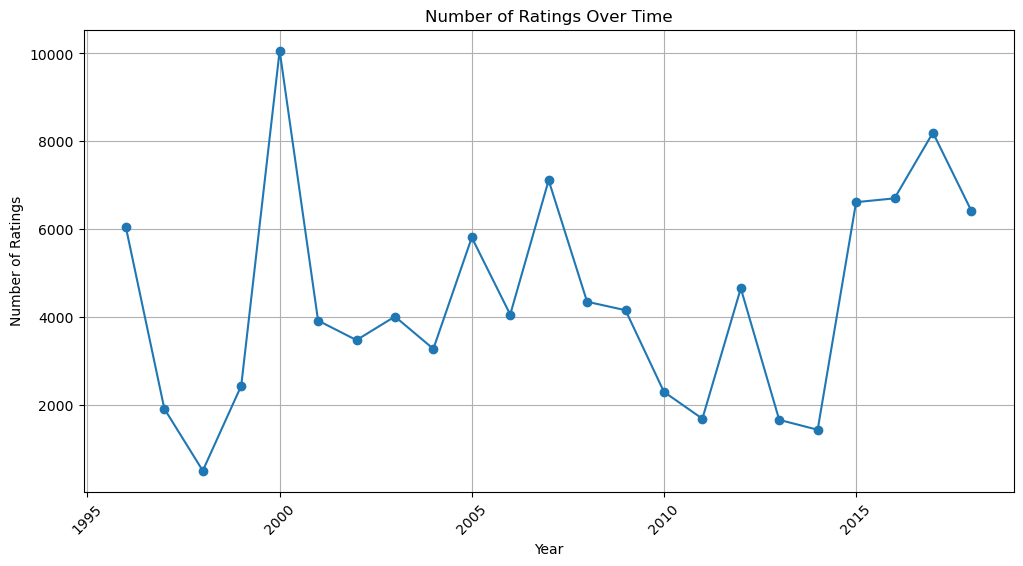

In [22]:
# Extract year from timestamp
movies_ratings['year'] = movies_ratings['timestamp'].dt.year

# Count ratings per year
ratings_per_year = movies_ratings.groupby('year')['rating'].count()

# Plot ratings over time
plt.figure(figsize=(12, 6))
ratings_per_year.plot(kind='line', marker='o')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


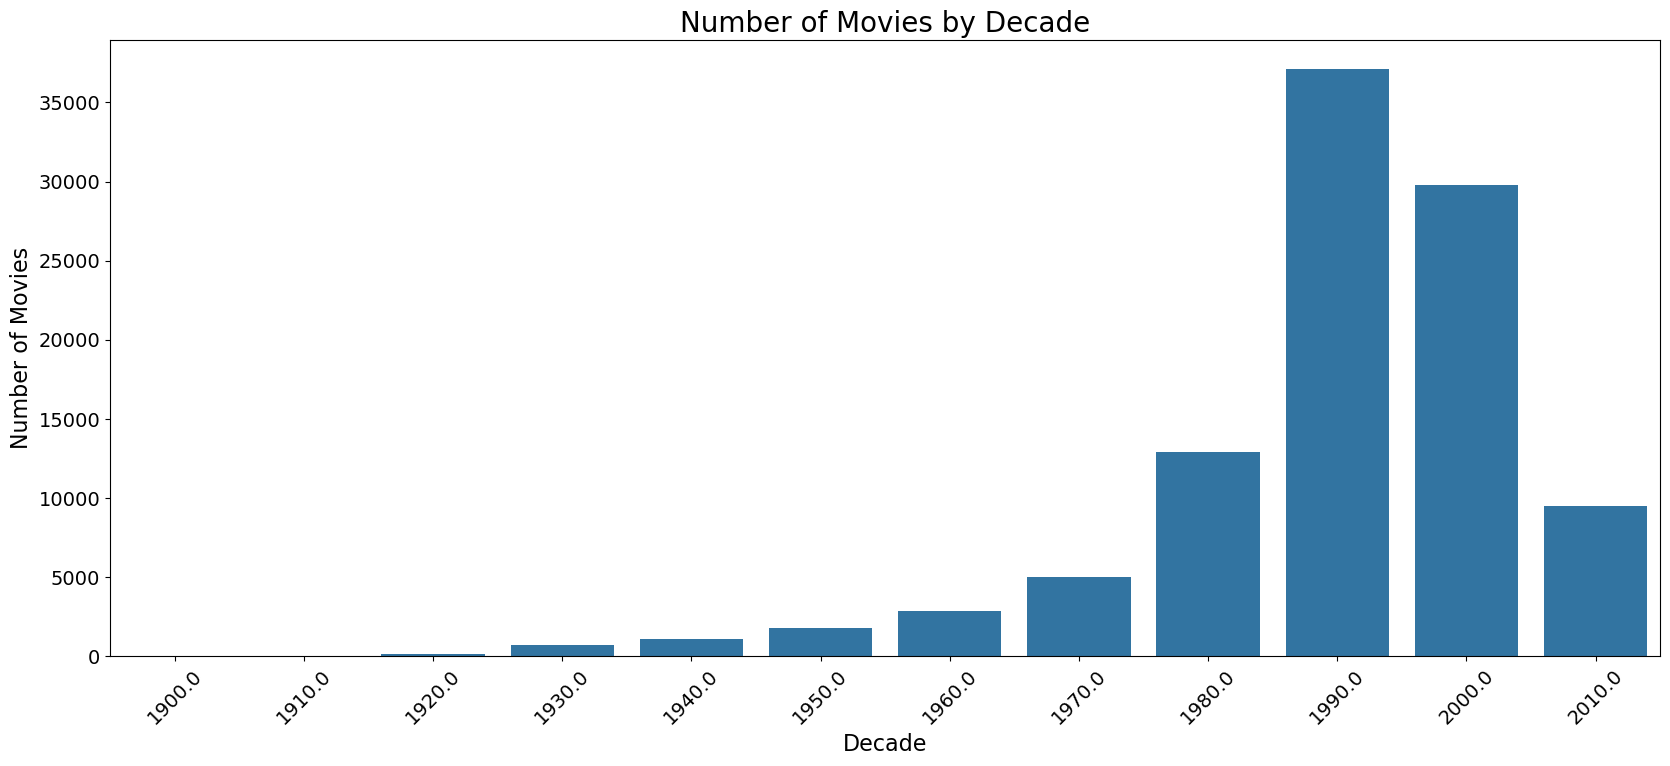

In [23]:


# Globally suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'


# Convert 'Year' column to numeric type (integer)
movies_ratings['Year'] = pd.to_numeric(movies_ratings['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' (if any)
movies_ratings = movies_ratings.dropna(subset=['Year'])

# Calculate decade for each movie
movies_ratings['Decade'] = (movies_ratings['Year'] // 10) * 10

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x='Decade',
              data=movies_ratings,
              color='tab:blue')

plt.xlabel("Decade", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)
plt.title("Number of Movies by Decade", fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
ax.grid(False)

# Update x-axis labels with the decade range
decades = sorted(movies_ratings['Decade'].dropna().unique())
plt.xticks(np.arange(len(decades)), decades)

plt.show()


The production of movies gradually rose from the 1920s, reaching its peak in the 1990s, before declining in the early 2000s to levels comparable to those seen in the 1980s.

##### 4.)DISTRIBUTION OF MOVIE GENRES

In [24]:
from collections import Counter

genre_frequency = Counter(g for genres in movies['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [25]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 4361), ('Comedy', 3756), ('Thriller', 1894), ('Action', 1828), ('Romance', 1596)]


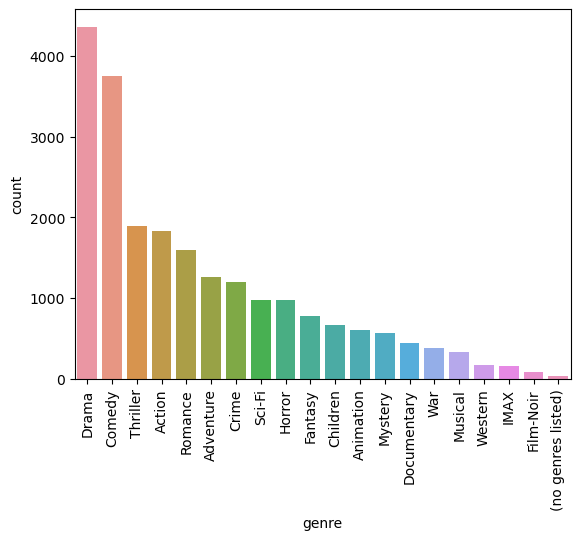

In [26]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

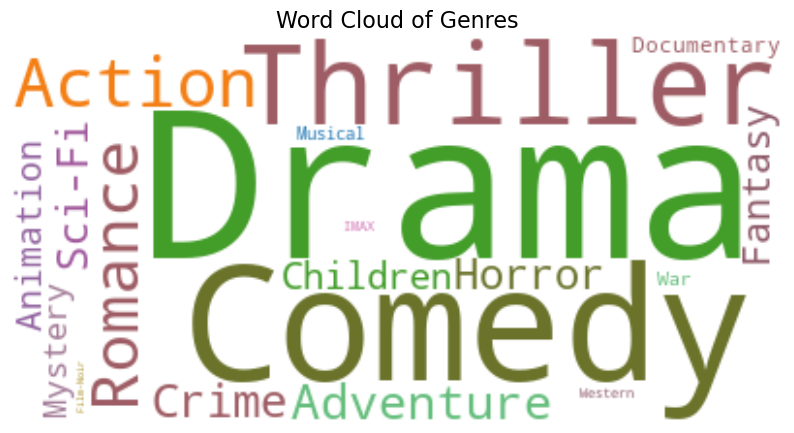

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

# Example data (replace with your actual genre frequencies)
genre_frequencies = {
    'Adventure': 1263,
    'Animation': 611,
    'Children': 664,
    'Comedy': 3756,
    'Fantasy': 779,
    'Romance': 1596,
    'Drama': 4361,
    'Action': 1828,
    'Crime': 1199,
    'Thriller': 1894,
    'Horror': 978,
    'Mystery': 573,
    'Sci-Fi': 980,
    'War': 382,
    'Musical': 334,
    'Documentary': 440,
    'IMAX': 158,
    'Western': 167,
    'Film-Noir': 87,
    '(no genres listed)': 34
}

# Define a custom colormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

cmap = LinearSegmentedColormap.from_list('custom', colors, N=20)  # N is the number of discrete colors to use

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', colormap=cmap)

# Generate the word cloud from the genre frequencies
wordcloud.generate_from_frequencies(genre_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Genres', fontsize=16)  # Add a title to the plot
plt.show()  # Show the plot


The top 5 genres are: Drama, Comedy, Thriller, Action and Romance

##### 5.)OUTLIER DETECTION IN MOVIE RATINGS

Indices of outliers detected using Z-score method: (array([], dtype=int64),)


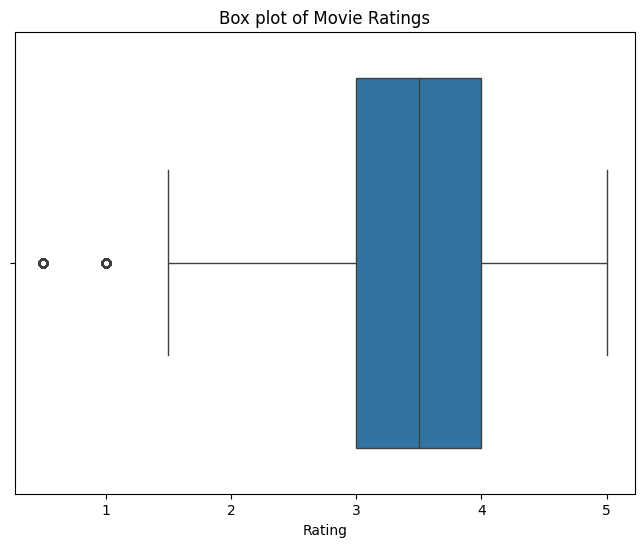

In [ ]:


# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

# Detect outliers in movie ratings
outliers_indices = detect_outliers_zscore(movies_ratings['rating'])

# Print indices of outliers
print("Indices of outliers detected using Z-score method:", outliers_indices)

# Visualize outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_ratings['rating'])
plt.title('Box plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()


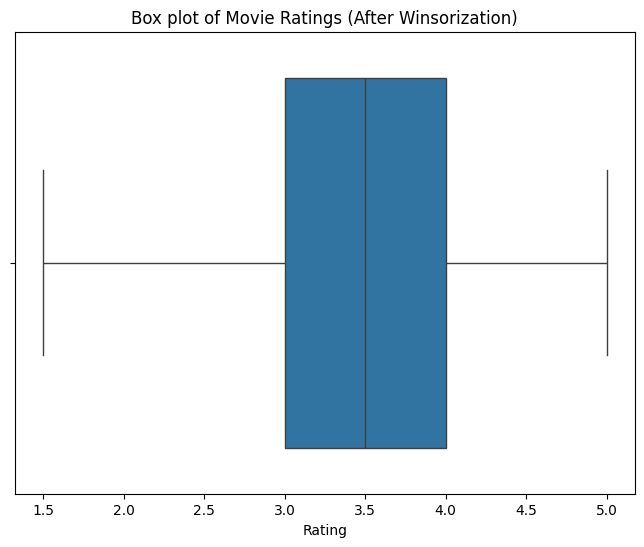

In [ ]:
from scipy.stats.mstats import winsorize

winsorized_ratings = winsorize(movies_ratings['rating'], limits=[0.05, 0.05])

# Replace the original 'rating' column with winsorized ratings
movies_ratings['rating'] = winsorized_ratings

# Check the distribution of ratings after winsorization
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_ratings['rating'])
plt.title('Box plot of Movie Ratings (After Winsorization)')
plt.xlabel('Rating')
plt.show()


# 5. Modelling.

In [47]:
#Datasets
movies_ratings.sample(5)

,userId,movieId,rating,timestamp,title,genres,Year,year,Decade
69539,414,53519,3.5,2008-03-10 18:30:57,Death Proof (2007),"[Action, Adventure, Crime, Horror, Thriller]",2007.0,2008,2000.0
78912,352,135143,4.0,2017-05-04 21:06:01,Fantastic Beasts and Where to Find Them (2016),[Fantasy],2016.0,2017,2010.0
78307,159,166643,5.0,2017-10-22 02:43:08,Hidden Figures (2016),[Drama],2016.0,2017,2010.0
58051,182,610,3.0,2003-06-05 03:17:02,Heavy Metal (1981),"[Action, Adventure, Animation, Horror, Sci-Fi]",1981.0,2003,1980.0
31639,593,377,2.5,2007-06-05 01:44:04,Speed (1994),"[Action, Romance, Thriller]",1994.0,2007,1990.0


# POPULARITY BASED RECOMMENDER SYSTEM.

In [105]:



class MovieRecommender:
    def __init__(self, data, test_size=0.2):
        """
        Initialize the MovieRecommender with a DataFrame and split the data.
        :param data: DataFrame containing the movie ratings dataset.
        :param test_size: Fraction of the data to use as the test set.
        """
        self.df = data
        self.test_size = test_size
        self.train_df = None
        self.test_df = None
        self.ratings_summary = None
        self.split_data()
        
    def split_data(self):
        """
        Split the data into training and test sets.
        """
        self.train_df, self.test_df = train_test_split(self.df, test_size=self.test_size, random_state=42)
        print(f"Training data shape: {self.train_df.shape}")
        print(f"Test data shape: {self.test_df.shape}")
        
    def calculate_movie_popularity(self):
        """
        Calculate the mean rating and rating count for each movie using the training data.
        """
        movie_ratings_mean = self.train_df.groupby('title')['rating'].mean()
        movie_ratings_count = self.train_df.groupby('title')['rating'].count()
        
        self.ratings_summary = pd.DataFrame({
            'mean_rating': movie_ratings_mean,
            'rating_count': movie_ratings_count
        })
        
    def predict_rating(self, movie_title):
        """
        Predict the rating for a given movie based on its mean rating from the training data.
        :param movie_title: The title of the movie.
        :return: Predicted rating.
        """
        return self.ratings_summary['mean_rating'].get(movie_title, np.nan)
    
    def calculate_rmse(self):
        """
        Calculate the Root Mean Squared Error (RMSE) using the test data.
        """
        if self.ratings_summary is None:
            self.calculate_movie_popularity()
        
        # Make predictions for the test set
        self.test_df['predicted_rating'] = self.test_df['title'].apply(self.predict_rating)
        
        # Drop rows where prediction is not available
        valid_test_df = self.test_df.dropna(subset=['predicted_rating'])
        
        # Calculate RMSE
        errors = valid_test_df['rating'] - valid_test_df['predicted_rating']
        rmse = np.sqrt(np.mean(errors ** 2))
        
        return rmse
    
    def get_popular_movies(self, min_ratings=50, top_n=10):
        """
        Get the top N popular movies.
        :param min_ratings: Minimum number of ratings a movie should have to be considered.
        :param top_n: Number of top movies to return.
        :return: DataFrame containing the top N movies.
        """
        if self.ratings_summary is None:
            self.calculate_movie_popularity()

        popular_movies = self.ratings_summary[self.ratings_summary['rating_count'] >= min_ratings]
        popular_movies = popular_movies.sort_values(by=['mean_rating', 'rating_count'], ascending=False)
        
        return popular_movies.head(top_n)

    def recommend_based_on_movie(self, movie_name=None, decade=None, min_ratings=50, top_n=5):
        """
        Recommend movies similar to the given movie based on popularity, or filter by decade.
        :param movie_name: The name of the movie to base recommendations on (optional).
        :param decade: The decade to filter recommendations (optional).
        :param min_ratings: Minimum number of ratings a movie should have to be considered.
        :param top_n: Number of top movies to return.
        :return: DataFrame containing the recommended movies.
        """
        if self.ratings_summary is None:
            self.calculate_movie_popularity()

        # Get the popular movies
        popular_movies = self.get_popular_movies(min_ratings, top_n + 1)
        
        if movie_name:
            # Ensure the movie_name is in the dataset
            if movie_name not in self.df['title'].values:
                raise ValueError(f"Movie '{movie_name}' not found in the dataset.")
            
            # Exclude the given movie from the recommendations if present
            popular_movies = popular_movies[~popular_movies.index.str.contains(movie_name)]

        if decade:
            # Filter by the decade of production
            decade_filtered_movies = self.df[self.df['Decade'] == decade]['title'].unique()
            popular_movies = popular_movies[popular_movies.index.isin(decade_filtered_movies)]
        
        # Return the top N movies
        return popular_movies.head(top_n)

    def display_recommendations(self, movie_name=None, decade=None, min_ratings=50, top_n=5):
        """
        Display movie recommendations based on the provided movie name or decade.
        :param movie_name: The name of the movie to base recommendations on (optional).
        :param decade: The decade to filter recommendations (optional).
        :param min_ratings: Minimum number of ratings a movie should have to be considered.
        :param top_n: Number of top movies to display.
        """
        try:
            recommended_movies = self.recommend_based_on_movie(movie_name, decade, min_ratings, top_n)
            print(f"Top {top_n} recommended movies {'from the decade ' + str(decade) if decade else 'based on the movie ' + movie_name if movie_name else ''}:")
            print(recommended_movies)
        except ValueError as e:
            print(e)


if __name__ == "__main__":
    
    
    
    # Create an instance of MovieRecommender with a test-train split
    recommender = MovieRecommender(movies_ratings, test_size=0.2)
    
    
    # Prompt the user to enter a movie name or decade
    movie_name = input("Enter a movie name to get recommendations (optional): ")
    decade_input = input("Enter the decade to get recommendations (optional): ")
    
    # Convert decade input to an integer if provided
    decade = int(decade_input) if decade_input else None
    
    # Display the recommendations
    recommender.display_recommendations(movie_name, decade, min_ratings=20, top_n=5)  # Adjust min_ratings and top_n as needed


Training data shape: (80654, 9)
Test data shape: (20164, 9)
Top 5 recommended movies :
                                  mean_rating  rating_count
title                                                      
Shawshank Redemption, The (1994)     4.424180           244
All About Eve (1950)                 4.350000            20
Departed, The (2006)                 4.344828            87
On the Waterfront (1954)             4.325000            20
Godfather, The (1972)                4.324324           148


In [106]:
# Calculate and display RMSE
rmse = recommender.calculate_rmse()
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    

Root Mean Squared Error (RMSE): 0.97


# CONTENT BASED RECOMMENDER SYSYTEM